AttributeError: 'ArtistList' object has no attribute 'clear'

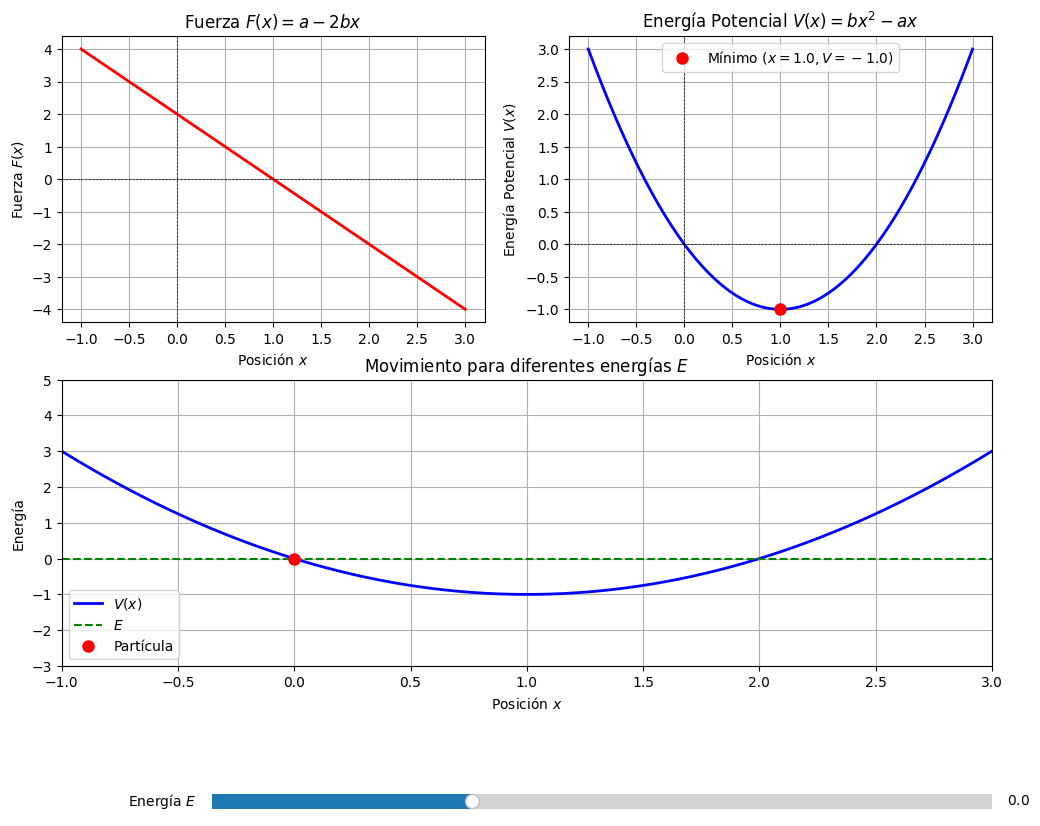

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Parámetros iniciales
a = 2.0  # Constante positiva
b = 1.0  # Constante positiva
x = np.linspace(-1, 3, 500)  # Rango de x

# Funciones
def F(x, a, b):
    return a - 2*b*x

def V(x, a, b):
    return b*x**2 - a*x

# Configuración de los gráficos
plt.figure(figsize=(12, 10))

# Gráfico de F(x)
plt.subplot(2, 2, 1)
plt.plot(x, F(x, a, b), 'r-', linewidth=2)
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)
plt.title('Fuerza $F(x) = a - 2bx$')
plt.xlabel('Posición $x$')
plt.ylabel('Fuerza $F(x)$')
plt.grid(True)

# Gráfico de V(x)
plt.subplot(2, 2, 2)
plt.plot(x, V(x, a, b), 'b-', linewidth=2)
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(0, color='k', linestyle='--', linewidth=0.5)
plt.title('Energía Potencial $V(x) = bx^2 - ax$')
plt.xlabel('Posición $x$')
plt.ylabel('Energía Potencial $V(x)$')
plt.grid(True)

# Puntos importantes
x_min = a/(2*b)
V_min = V(x_min, a, b)
plt.subplot(2, 2, 2)
plt.plot(x_min, V_min, 'ro', markersize=8, label=f'Mínimo ($x={x_min:.1f}, V={V_min:.1f}$)')
plt.legend()

# Gráfico de energía y movimiento
ax_motion = plt.subplot(2, 1, 2)
plt.subplots_adjust(bottom=0.25)  # Ajuste para el slider

# Líneas para el gráfico de energía
line_V, = plt.plot(x, V(x, a, b), 'b-', linewidth=2, label='$V(x)$')
line_E, = plt.plot([x[0], x[-1]], [0, 0], 'g--', linewidth=1.5, label='$E$')
point_part, = plt.plot([], [], 'ro', markersize=8, label='Partícula')

plt.title('Movimiento para diferentes energías $E$')
plt.xlabel('Posición $x$')
plt.ylabel('Energía')
plt.legend()
plt.grid(True)
plt.xlim(x[0], x[-1])
plt.ylim(-3, 5)

# Slider para ajustar la energía
ax_energy = plt.axes([0.25, 0.1, 0.65, 0.03])
energy_slider = Slider(
    ax=ax_energy,
    label='Energía $E$',
    valmin=V_min - 0.5,
    valmax=3.0,
    valinit=0.0,
)

# Función de actualización para el slider
def update(val):
    E = energy_slider.val
    line_E.set_ydata([E, E])
    
    # Puntos de retorno (donde V(x) = E)
    roots = np.roots([b, -a, -E])
    real_roots = np.real(roots[np.isreal(roots)])
    real_roots = sorted(real_roots)
    
    # Actualizar posición de la partícula (simulación simplificada)
    if len(real_roots) >= 1:
        if E >= 0:
            # Movimiento no acotado
            x_part = real_roots[0] + 0.1*E  # Simulación simple
        else:
            # Movimiento oscilatorio entre raíces
            x_part = real_roots[0] + (real_roots[-1] - real_roots[0]) * 0.5
    else:
        x_part = x_min
    
    point_part.set_data([x_part], [E])
    
    # Resaltar regiones permitidas
    ax_motion.collections.clear()
    if E >= V_min:
        if len(real_roots) == 2:
            ax_motion.fill_between(x, V(x, a, b), E, where=(x >= real_roots[0]) & (x <= real_roots[1]), 
                                color='green', alpha=0.2)
    plt.draw()

energy_slider.on_changed(update)
update(0)  # Inicialización

plt.tight_layout()
plt.show()